# Supervised ML - Multiple Linear Regression - Cars dataset

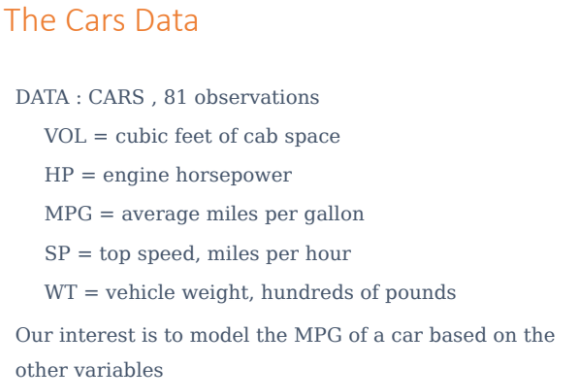

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot #for Leverage value

In [2]:
# import the dataset
cars=pd.read_csv('Database/Cars.csv')
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


## EDA 

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

## Correlation Analysis

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


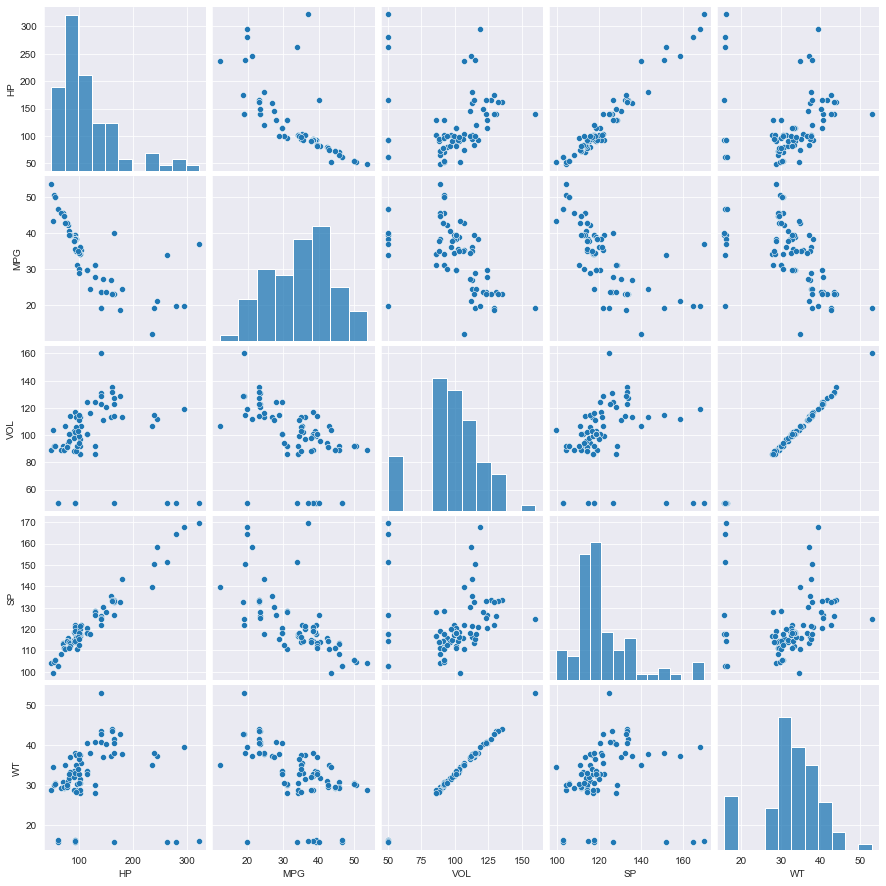

In [6]:
# Scatterplot between variables along with histograms
sns.set_style(style='darkgrid')
sns.pairplot(cars)

## Model Building

In [7]:
model=smf.ols('MPG~HP+VOL+SP+WT',data=cars).fit()

## Model Testing

In [8]:
# Finding Coefficient parameters
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [9]:
# Intercept is Beta0=30.677336, Beta1=-0.205444, Beta2=-0.336051, Beta3=0.395627, Beta4=0.400574

In [10]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    2.058841
 HP          -5.238735
 VOL         -0.590970
 SP           2.499880
 WT           0.236541
 dtype: float64,
 Intercept    0.042936
 HP           0.000001
 VOL          0.556294
 SP           0.014579
 WT           0.813649
 dtype: float64)

In [11]:
# Finding rsquared values
model.rsquared , model.rsquared_adj   # Model accuracy is 75.85%

(0.7705372737359844, 0.7584602881431415)

In [12]:
# Build SLR and MLR models for insignificant variables 'VOL' and 'WT'
# Also find their tvalues and pvalues

In [13]:
slr_v=smf.ols('MPG~VOL',data=cars).fit()
slr_v.tvalues , slr_v.pvalues  # VOl has significant pvalue

(Intercept    14.106056
 VOL          -5.541400
 dtype: float64,
 Intercept    2.753815e-23
 VOL          3.822819e-07
 dtype: float64)

In [14]:
slr_w=smf.ols('MPG~WT',data=cars).fit()
slr_w.tvalues , slr_w.pvalues  # Wt has significant pvalue

(Intercept    14.248923
 WT           -5.508067
 dtype: float64,
 Intercept    1.550788e-23
 WT           4.383467e-07
 dtype: float64)

In [15]:
mlr_vw=smf.ols('MPG~VOL+WT',data=cars).fit()
mlr_vw.tvalues , mlr_vw.pvalues  # VOl & Wt together have insignificant pvalue, either of the one has to be used

(Intercept    12.545736
 VOL          -0.709604
 WT            0.489876
 dtype: float64,
 Intercept    2.141975e-20
 VOL          4.800657e-01
 WT           6.255966e-01
 dtype: float64)

## Model Validation Techniques 
### Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [16]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_hp=smf.ols('HP~VOL+SP+WT',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_vol=smf.ols('VOL~HP+SP+WT',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp=smf.ols('SP~HP+VOL+WT',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)

rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

# Putting the values in Dataframe format
d1={'Variables':['HP','VOL','SP','WT'],'Vif':[vif_hp,vif_vol,vif_sp,vif_wt]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,HP,19.926589
1,VOL,638.806084
2,SP,20.007639
3,WT,639.533818


In [17]:
# Here, VOL & WT both have VIF>20, thus have collinearity problem.Thus remove either of the collinear variable.

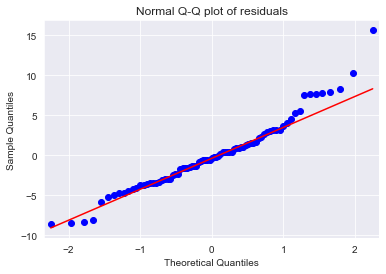

In [18]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid>10))  # outliar detection from above QQ plot of residuals

[array([ 0, 76], dtype=int64)]

In [20]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

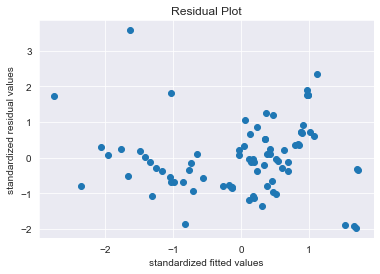

In [21]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [22]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

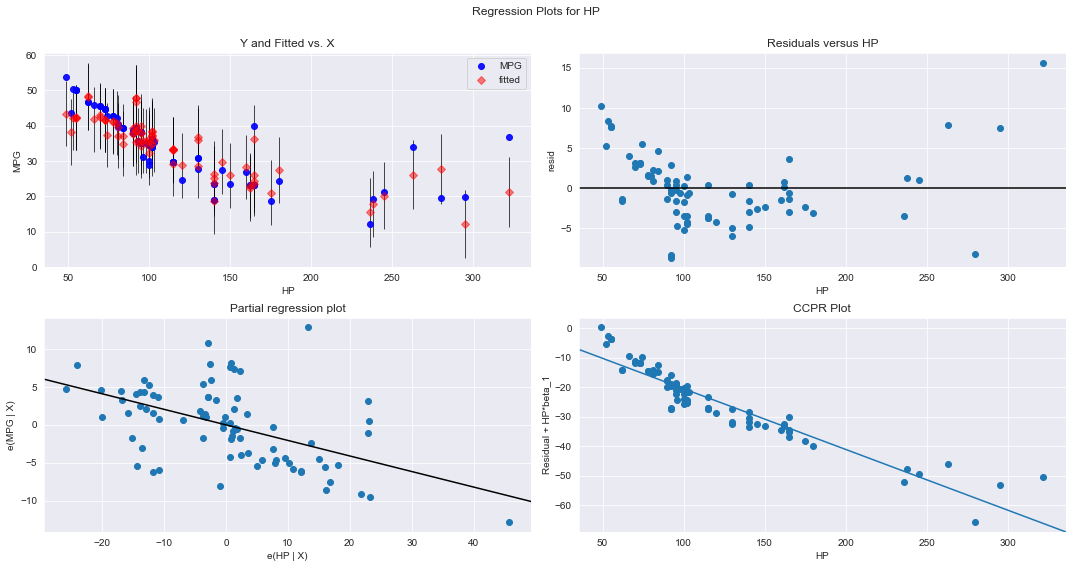

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

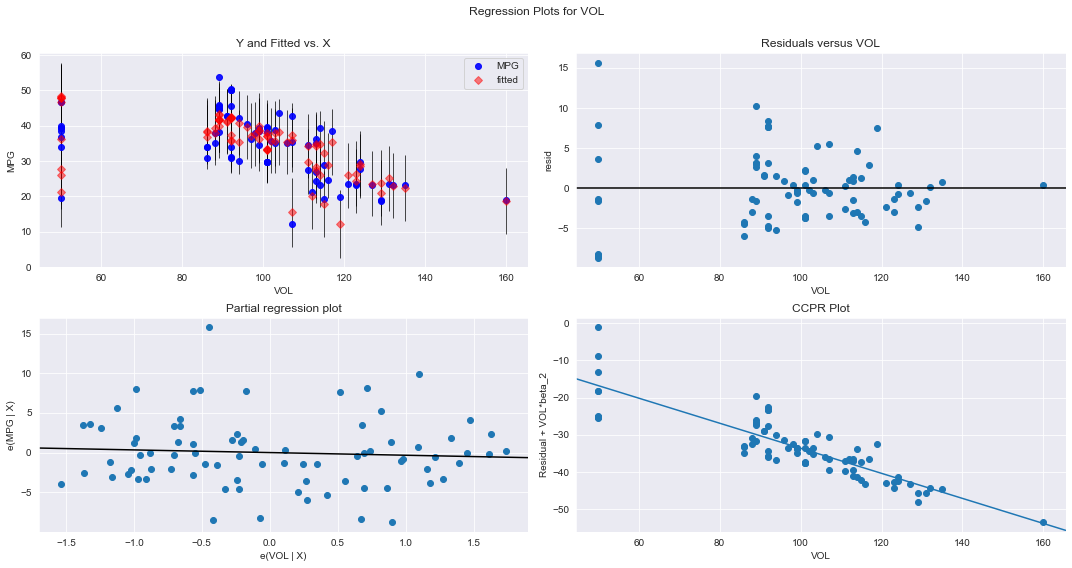

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

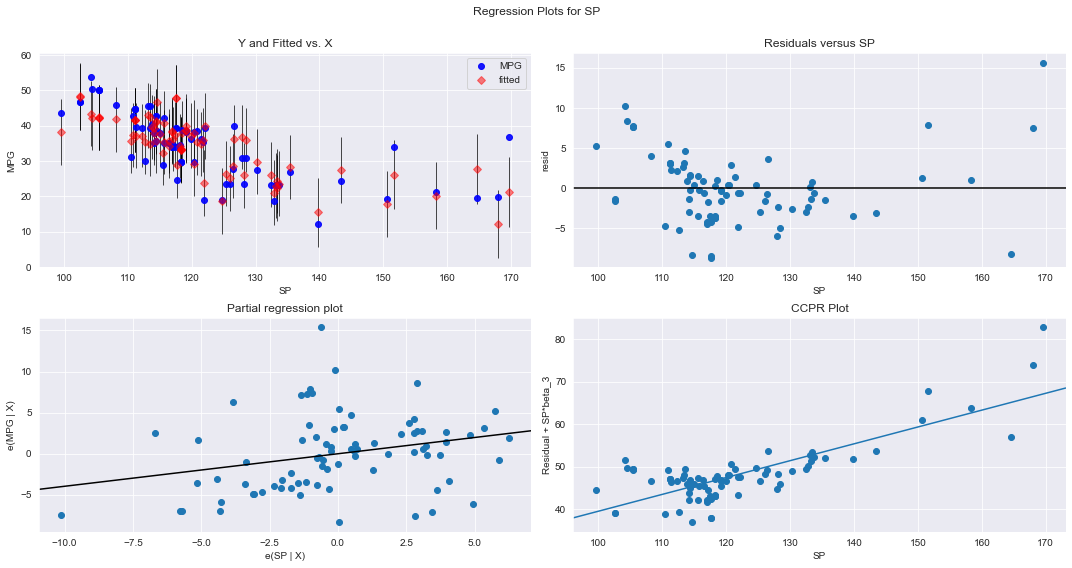

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

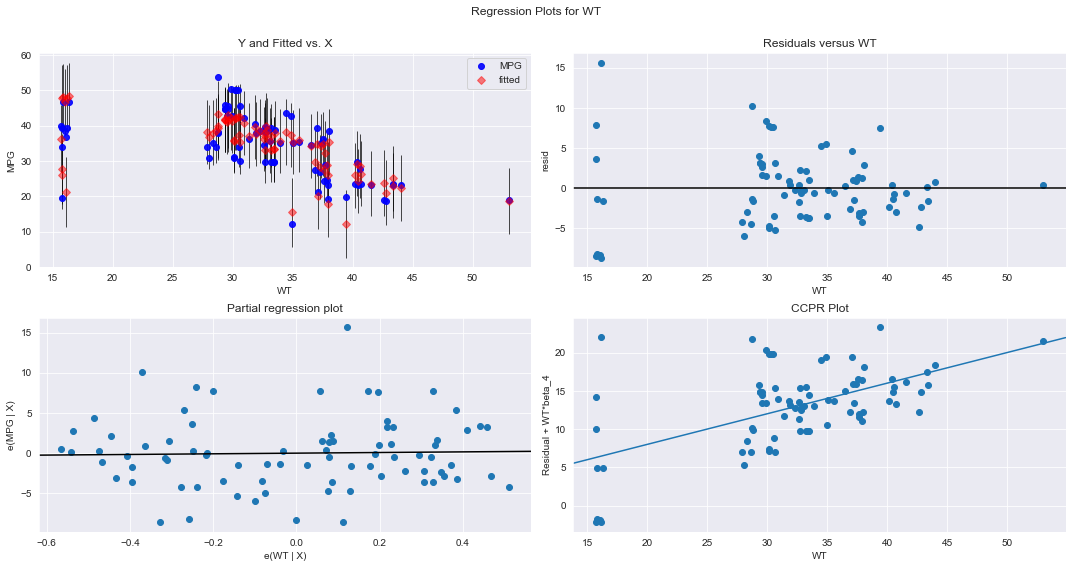

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [27]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

<ipython-input-28-ca5cd1df4fff>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars)),np.round(c,3))


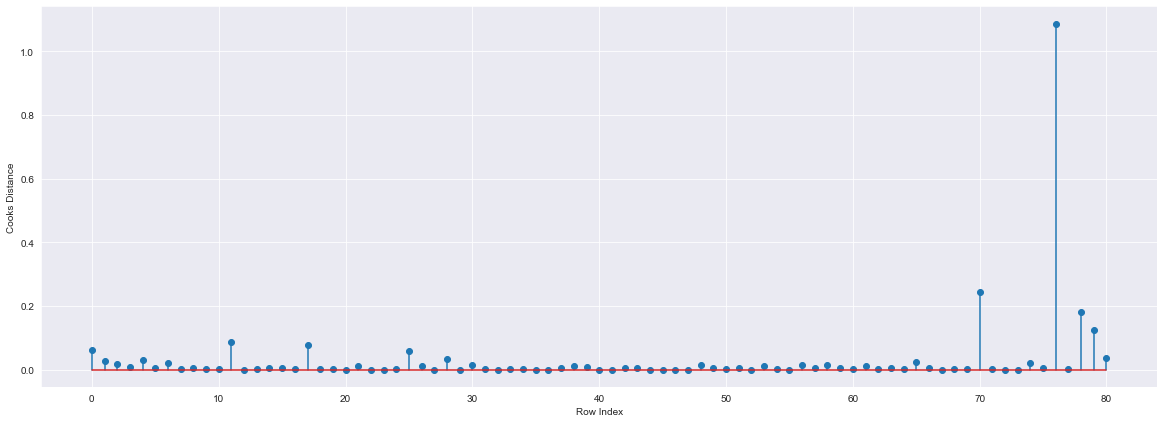

In [28]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
# Index and value of influencer where C>1
np.argmax(c) , np.max(c)

(76, 1.0865193998179896)

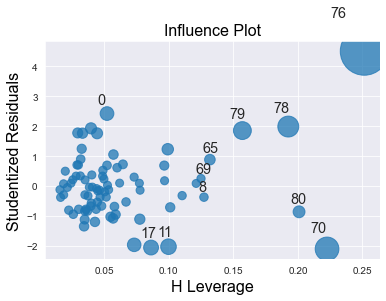

In [30]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [31]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=cars.shape[1]
n=cars.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.2222222222222222

In [32]:
# Those Outlier values of index is in index numbers
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [33]:
# See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## Improving the Model

In [34]:
# Creating a copy of data so that original dataset is not affected
cars_new=cars.copy()
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [35]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
cars1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index(drop=True)
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


## Collinearity Remedy : Best Subset Selection using Rsquared and AIC values

In [36]:
# Rebuild the Models using either of the collinear variables on new data

In [37]:
# Exclude variable "WT" and generate R-Squared and AIC values
model_v=smf.ols('MPG~VOL+HP+SP',data=cars1).fit()

In [38]:
model_v.rsquared , model_v.aic

(0.8161692010376005, 446.11722639447737)

In [39]:
# Exclude variable "VOL" and generate R-Squared and AIC values
model_w=smf.ols('MPG~WT+HP+SP',data=cars1).fit()

In [40]:
model_w.rsquared , model_w.aic

(0.8160034320495303, 446.1884323575032)

## Model - Re-build, Re-check and Re-improve - 2

In [41]:
# Rebuild the model on the new data (Select final model from above)
model_v=smf.ols('MPG~VOL+HP+SP',data=cars1).fit()

In [42]:
# Recheck influencers using Cook's distance

In [43]:
# Get influencers using cook's distance
(c_v,_)=model_v.get_influence().cooks_distance
c_v

array([5.53495774e-02, 2.85062799e-02, 2.85062799e-02, 5.34950005e-03,
       3.55869338e-02, 3.79038996e-03, 2.85062799e-02, 1.32771748e-03,
       1.32771748e-03, 7.56691001e-04, 3.33261259e-03, 1.23339926e-01,
       1.14076048e-03, 3.33261259e-03, 6.21782521e-03, 3.33261259e-03,
       7.09472284e-04, 1.23339926e-01, 7.09472284e-04, 1.25650858e-04,
       1.65511111e-04, 1.01187126e-02, 9.35876569e-06, 1.90597263e-04,
       1.71252801e-03, 9.20677227e-02, 4.07373927e-03, 1.65511111e-04,
       4.16239310e-02, 3.31390188e-04, 6.85632716e-03, 1.32756399e-03,
       3.93747165e-04, 7.49398680e-04, 1.27154771e-03, 6.48751557e-06,
       4.76583309e-04, 4.91748288e-03, 4.91748288e-03, 1.49663702e-02,
       1.43677902e-04, 3.71158078e-05, 2.37724155e-03, 2.97638136e-03,
       6.13773416e-05, 6.29555458e-04, 8.19182717e-08, 1.01290206e-04,
       2.15887173e-02, 3.96459368e-03, 3.96459368e-03, 3.96459368e-03,
       3.11686431e-06, 1.13032165e-02, 9.69905045e-04, 5.96059114e-04,
      

<ipython-input-44-36b4ce833475>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars1)),np.round(c_v,3))


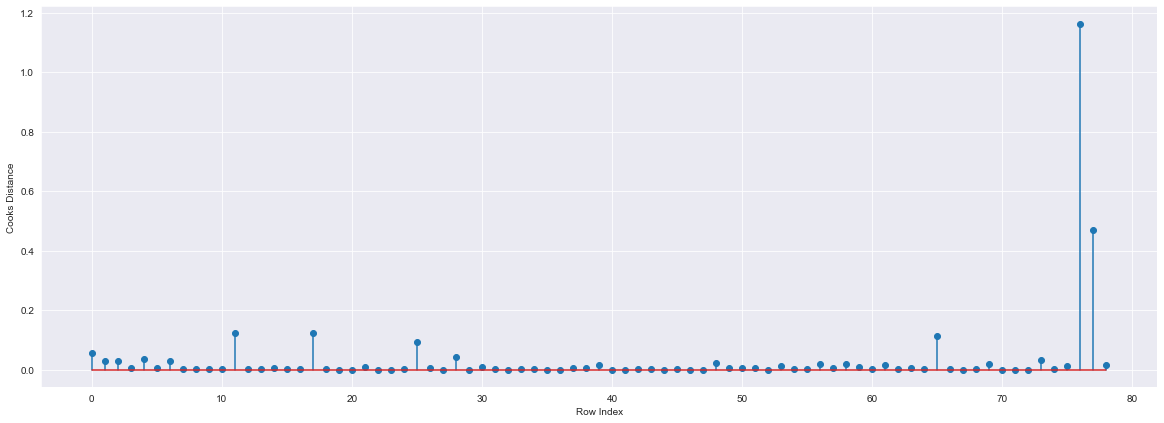

In [44]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars1)),np.round(c_v,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
# Index and value of influencer where C>1
np.argmax(c_v) , np.max(c_v)

(76, 1.1629387469135126)

In [46]:
# Reimprove the Model by dropping influencers

In [47]:
# Discard the data points which are influencers and reassign the row number (reset_index())
cars2=cars1.drop(cars1.index[[76]],axis=0).reset_index(drop=True)
cars2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,295,19.833733,119,167.944460,39.423099


## Model - Re-build, Re-check and Re-improve - 3

In [48]:
# Rebuild the model on the new data
model_v=smf.ols('MPG~VOL+HP+SP',data=cars2).fit()

In [49]:
# Recheck influencers using Cook's distance
# Get influencers using cook's distance
(c_v,_)=model_v.get_influence().cooks_distance
c_v

array([6.00643020e-02, 3.01041792e-02, 3.01041792e-02, 4.55080735e-03,
       3.77482934e-02, 3.33316639e-03, 3.01041792e-02, 9.28389740e-04,
       9.28389740e-04, 4.61059555e-04, 3.54160247e-03, 1.09873207e-01,
       3.22440506e-03, 3.54160247e-03, 6.59414666e-03, 3.54160247e-03,
       5.57007771e-04, 1.09873207e-01, 5.57007771e-04, 3.78932297e-08,
       5.04661895e-04, 9.57788156e-03, 1.83209795e-04, 9.55901302e-05,
       1.79088663e-03, 7.99583159e-02, 1.22180702e-03, 5.04661895e-04,
       3.78767603e-02, 9.39011700e-04, 5.75354249e-03, 1.18961136e-03,
       4.60491856e-04, 1.91177808e-04, 1.06997298e-03, 3.27955217e-07,
       3.51409910e-04, 4.65109638e-03, 4.65109638e-03, 1.41554819e-02,
       2.26815289e-06, 1.39669054e-04, 2.32345177e-03, 2.64657278e-03,
       1.18239375e-04, 7.03324096e-04, 6.98268531e-05, 1.71230492e-04,
       2.01317340e-02, 3.78431859e-03, 3.78431859e-03, 3.78431859e-03,
       2.55792400e-04, 8.49775841e-03, 5.67355078e-04, 1.40690206e-03,
      

<ipython-input-50-095030186e9a>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars2)),np.round(c_v,3))


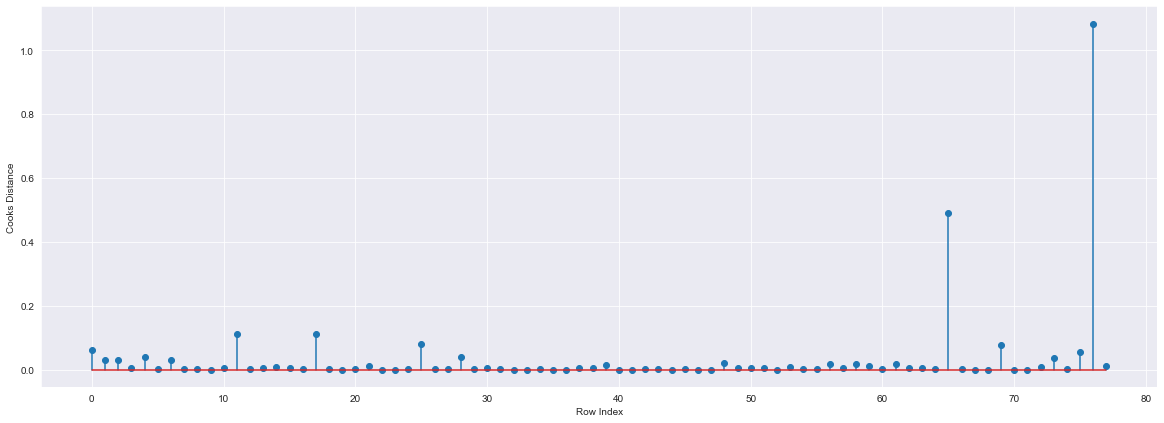

In [50]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars2)),np.round(c_v,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
# Index and value of influencer where C>1
np.argmax(c_v) , np.max(c_v)

(76, 1.0834592065958668)

In [52]:
# Reimprove the Model by dropping influencers
# Discard the data points which are influencers and reassign the row number (reset_index())
cars3=cars2.drop(cars2.index[[76]],axis=0).reset_index(drop=True)
cars3

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


## Model - Re-build, Re-check and Re-improve - 4 

In [53]:
# Rebuild the model on the new data
model_v=smf.ols('MPG~VOL+HP+SP',data=cars3).fit()

In [54]:
# Recheck influencers using Cook's distance
# Get influencers using cook's distance
(c_v,_)=model_v.get_influence().cooks_distance
c_v

array([6.67624758e-02, 3.14966307e-02, 3.14966307e-02, 4.41723601e-03,
       3.97043587e-02, 3.18490107e-03, 3.14966307e-02, 2.72885950e-05,
       2.72885950e-05, 4.23158478e-04, 3.36657172e-03, 1.11242286e-01,
       2.48821721e-03, 3.36657172e-03, 6.02019366e-03, 3.36657172e-03,
       4.76170508e-04, 1.11242286e-01, 4.76170508e-04, 8.82063701e-08,
       4.85657000e-04, 9.04771072e-03, 1.03596157e-04, 2.90455670e-05,
       1.62817845e-03, 8.44546582e-02, 1.41130179e-03, 4.85657000e-04,
       2.35932141e-02, 7.74080941e-04, 5.13295810e-03, 8.85600593e-04,
       3.71445242e-04, 3.34592443e-04, 6.55775719e-04, 6.50001470e-06,
       5.18707563e-04, 5.17386941e-03, 5.17386941e-03, 1.14762595e-02,
       1.77539300e-05, 2.94570648e-04, 2.60372905e-03, 3.42589309e-03,
       2.95070478e-04, 8.57428219e-04, 1.22100386e-04, 2.68649147e-04,
       1.72755037e-02, 4.28555597e-03, 4.28555597e-03, 4.28555597e-03,
       3.62914824e-04, 7.40875771e-05, 2.07146665e-04, 9.39876467e-04,
      

<ipython-input-55-67901c574f95>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars3)),np.round(c_v,3))


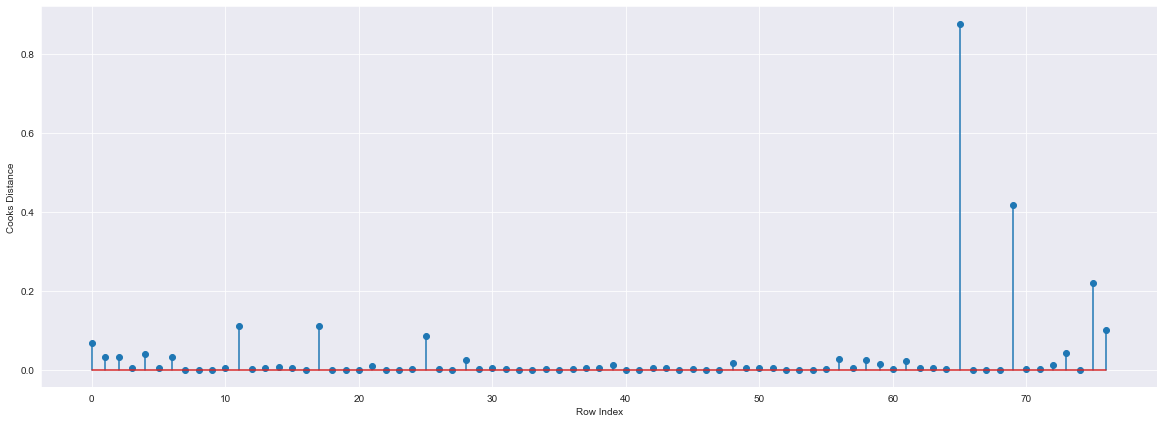

In [55]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars3)),np.round(c_v,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
# Index and value of influencer where C>1
np.argmax(c_v) , np.max(c_v)

(65, 0.8774556986296687)

## Final Model

In [57]:
final_model=smf.ols('MPG~VOL+HP+SP',data=cars3).fit()

In [58]:
final_model.rsquared , final_model.aic

(0.866963611185906, 409.41530627195084)

## Model Predictions

In [59]:
# say New data for prediction is
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102},index=[0])
new_data

,HP,VOL,SP
0,40,95,102


In [60]:
# Manual Prediction of MPG
final_model.predict(new_data)

0    46.035594
dtype: float64

In [61]:
# Automatic Prediction of MPG with 86.70% accurcy
pred_y=final_model.predict(cars3)
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
72    20.679595
73    23.666406
74    19.212878
75    12.198598
76     9.161202
Length: 77, dtype: float64